In [1]:
# install necessary libraries

# !pip install transformers 
# !pip install torch==6.0
# !pip install datasets
# !pip install Arabic-Stopwords

# !pip install arabic_reshaper --quiet
# !pip install python-bidi --quiet

from IPython.display import clear_output
clear_output()

In [47]:
# https://github.com/motazsaad/process-arabic-text/blob/master/clean_arabic_text.py

import re
import string
import sys
import argparse
import arabicstopwords.arabicstopwords as stp

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_list = stopwords.words('arabic')

extra_stopwords = ['ال']
all_arabic_stopwords = list(stp.stopwords_list()) + stopwords_list + extra_stopwords


arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

def remove_diacritics(text):
  text = re.sub(arabic_diacritics, '', text)
  return text

def remove_repeating_char(text):
  return re.sub(r'(.)\1+', r'\1', text)

def remove_newlines(text):
  text = re.sub('\n'," . ",text)
  return text  

def remove_stopwords(text):
  tokens = text.split(' ')
  for word in tokens:
    if word in string.punctuation: 
      continue
    # print(word)
    if word.replace(" ", "") in all_arabic_stopwords:
      # word = word.replace(" ", "")
      text = re.sub(r'\b'+word + r'\b', "", text)
      text = re.sub(r'^' +word + r'\s', "", text)
      text = re.sub(r'\s'+word+ r'$', "", text)

  return text

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

def replace_emoji(text): 
    text = re.sub(r'<3|< 3|❤️|💖|😍|💕|😘|🥰|💕|💝|💗|💜|💙|🖤|💚|💛|🤍|❤',
                  ' قلب ',
                  text) 

    text = re.sub(r':P|:-P|😂|🤣',
                  ' ضحك ',
                  text)

    text = re.sub(r'[☺😌😁😃😄😆😊😸😺😊😀😋☺️🙂💃]',
                  ' سعادة ',
                  text)
    
    
    text = re.sub(r':D',
                  ' سعادة ',
                  text)

    text = re.sub(r'[😥😣😓😔😕☹️🙁😖😞😟😢😭😩😿😫😩💔]',
                  ' حزن  ',
                  text)
    text = re.sub(r'(::|\)-:)',
                  '  حزن  ', 
                  text)
    text = re.sub(r'(:,\(|:\'\(|:"\()',
                  ' حزن ', 
                  text)

    text = re.sub(r'[😨😱😵]',
                  ' مفاجأة ', 
                  text)

    text = re.sub(r'[😳😅🙈]',
                  ' محرج ', 
                  text)

    text = re.sub(r'[😤😠😡🤬👿]',
                  ' غضب ', 
                  text)

    text = re.sub(r'[😑😒🙄😐😶]',
                  ' ملل ', 
                  text)

    text = re.sub('[\U0001F600-\U0001FFFF]'," ", text)
    text = re.sub('[\U0001F300-\U0001F5FF]'," ", text)
    text = re.sub('[\U0001F680-\U0001F6FF]'," ", text)
    text = re.sub('["\U0001F1E0-\U0001F1FF]'," ", text)

    
    weirdPatterns = re.compile("["
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u'\U00010000-\U0010ffff'
                               u"\u200d"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\u3030"
                               u"\ufe0f"
                               u"\u2069"
                               u"\u2066"
                               u"\u200c"
                               u"\u2068"
                               u"\u2067"
                               "]+", flags=re.UNICODE)
    text = weirdPatterns.sub(r'', text)
    
    return text







[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


* |0 |none | 1550 | 
* |1 |anger | 1444 | 
* |2 |joy | 1281 | 
* |3 |sadness | 1256 | 
* |4 |love | 1220 | 
* |5 |sympathy | 1062 | 
* |6 |surprise | 1045 | 
* |7 |fear | 1207 |

In [48]:
import datasets
from datasets import load_dataset
import pandas as pd

dataset = load_dataset('emotone_ar')  
df = dataset['train'].to_pandas()
df

  0%|          | 0/1 [00:00<?, ?it/s]

,tweet,label
0,الاوليمبياد الجايه هكون لسه ف الكليه ..,0
1,عجز الموازنه وصل ل93.7 % من الناتج المحلي يعني...,1
2,كتنا نيله ف حظنا الهباب xD,3
3,جميعنا نريد تحقيق اهدافنا لكن تونس تالقت في حر...,2
4,الاوليمبياد نظامها مختلف .. ومواعيد المونديال ...,0
...,...,...
10060,2222: يلا يا جماعه حفله عمرو دياب خلصت نريح شو...,3
10061,Mohamed5: اييييه دااا 😲😲 اوزيييل❤,6
10062,عملتلها ريتويت بمناسبه ساره بتاعه الاوليمبياد 😃,0
10063,وعليك قبلنا يانجم النجوم ياعندليب الحب والاحساس,2


In [49]:
import emoji
def extract_emojis(s):
  return [c for c in s if c in emoji.EMOJI_DATA]

def split_count(text):
    emoji_list = []
    data = text
    for word in data:
        if word in emoji.EMOJI_DATA:
            emoji_list.append(word)
    
    return emoji_list


text = df['tweet']
emoji_list= [] 
for t in text:
  emoji_list=emoji_list+split_count(t)

from collections import Counter

print(Counter(emoji_list))

Counter({'😂': 730, '❤': 311, '💔': 282, '😍': 132, '😭': 122, '✋': 95, '♥': 87, '😢': 86, '👏': 79, '😔': 74, '😅': 56, '💜': 49, '🏻': 45, '💙': 39, '😞': 38, '💕': 38, '✌': 38, '🏼': 35, '👌': 33, '😄': 30, '😊': 30, '😌': 29, '😀': 25, '😒': 25, '💪': 25, '🌹': 24, '🙈': 24, '🙏': 23, '🤔': 23, '✨': 23, '😏': 22, '😴': 22, '😐': 22, '😓': 21, '😕': 20, '🙂': 20, '☺': 19, '😑': 18, '😳': 18, '👍': 18, '🙄': 17, '💗': 17, '🌸': 16, '😎': 16, '😃': 16, '😩': 15, '💭': 15, '💞': 15, '💚': 14, '💛': 14, '👊': 13, '🚶': 13, '🌚': 11, '💃': 11, '🎶': 11, '🏽': 10, '💘': 10, '🏃': 10, '😶': 10, '😨': 9, '❣': 9, '😱': 9, '😣': 9, '😫': 9, '🍃': 8, '😜': 8, '🎵': 8, '🙃': 8, '💟': 8, '🐸': 8, '🔸': 8, '😉': 7, '🎼': 7, '🔥': 7, '🌷': 7, '🍁': 7, '😁': 6, '‼': 6, '😪': 6, '😷': 6, '😖': 6, '🍂': 6, '😡': 6, '🙊': 5, '👐': 5, '👇': 5, '🎻': 5, '🤕': 5, '☝': 5, '😤': 5, '✊': 5, '💖': 5, '😥': 5, '🕊': 5, '🎉': 5, '✒': 5, '😟': 5, '👎': 5, '😬': 5, '🚬': 5, '😆': 5, '🏿': 5, '❗': 5, '🎬': 5, '💋': 4, '💵': 4, '💎': 4, '😻': 4, '☹': 4, '☕': 4, '💐': 4, '🔕': 4, '😰': 4, '🌿': 4, '🌼': 4, '😿': 4,

# Analysis

Initial pre-processing before analysis

In [50]:
tweets = df['tweet']
tweets_processed = [remove_stopwords(remove_punctuations(replace_emoji(remove_repeating_char(remove_newlines(remove_diacritics(item)))))) for item in tweets]

In [51]:
df['tweets_processed']=tweets_processed

In [52]:
df

,tweet,label,tweets_processed
0,الاوليمبياد الجايه هكون لسه ف الكليه ..,0,الاوليمبياد الجايه هكون لسه الكليه
1,عجز الموازنه وصل ل93.7 % من الناتج المحلي يعني...,1,عجز الموازنه وصل ل937 الناتج المحلي يعني لسه...
2,كتنا نيله ف حظنا الهباب xD,3,كتنا نيله حظنا الهباب xD
3,جميعنا نريد تحقيق اهدافنا لكن تونس تالقت في حر...,2,نريد تحقيق اهدافنا تونس تالقت حراسه المرمي
4,الاوليمبياد نظامها مختلف .. ومواعيد المونديال ...,0,الاوليمبياد نظامها مختلف ومواعيد المونديال مك...
...,...,...,...
10060,2222: يلا يا جماعه حفله عمرو دياب خلصت نريح شو...,3,2 يلا جماعه حفله عمرو دياب خلصت نريح شويه ونب...
10061,Mohamed5: اييييه دااا 😲😲 اوزيييل❤,6,Mohamed5 ايه دا اوزيل قلب
10062,عملتلها ريتويت بمناسبه ساره بتاعه الاوليمبياد 😃,0,عملتلها ريتويت بمناسبه ساره بتاعه الاوليمبياد ...
10063,وعليك قبلنا يانجم النجوم ياعندليب الحب والاحساس,2,قبلنا يانجم النجوم ياعندليب الحب والاحساس


In [53]:
df.head(40)

,tweet,label,tweets_processed
0,الاوليمبياد الجايه هكون لسه ف الكليه ..,0,الاوليمبياد الجايه هكون لسه الكليه
1,عجز الموازنه وصل ل93.7 % من الناتج المحلي يعني...,1,عجز الموازنه وصل ل937 الناتج المحلي يعني لسه...
2,كتنا نيله ف حظنا الهباب xD,3,كتنا نيله حظنا الهباب xD
3,جميعنا نريد تحقيق اهدافنا لكن تونس تالقت في حر...,2,نريد تحقيق اهدافنا تونس تالقت حراسه المرمي
4,الاوليمبياد نظامها مختلف .. ومواعيد المونديال ...,0,الاوليمبياد نظامها مختلف ومواعيد المونديال مك...
5,دلوقتي عندها اربع سنين .... ومحدش يقدر يكلمها ...,6,دلوقتي اربع سنين ومحدش يقدر يكلمها اله
6,الحب يسلبها كيدها يرجعها الي براءتها الاولي وي...,4,الحب يسلبها كيدها يرجعها الي براءتها الاولي وي...
7,she3er: شوفي بـ عيني امنيات الغلابه واحلام ثلث...,5,she3er شوفي امنيات الغلابه واحلام ثلثين الشع...
8,86: صوتك هو حبيبي الثالث بعدك وبعد عيونك ~...,4,86 صوتك حبيبي الثالث عيونك بوح غزل
9,عمر عسر اتغلب وخرج وبيكمل مسيره مصر الفاشله في...,3,عمر عسر اتغلب وخرج وبيكمل مسيره مصر الفاشله ا...


In [61]:
mapping_labels = {0:'none',
1:'anger' ,
2:'joy', 
3:'sadness',
4:'love' ,
5:'sympathy',
6:'surprise',
7:'fear'}

In [64]:
import pandas as pd
from collections import Counter

grouped = df.groupby('label')

for label, group in grouped:
    text = ' '.join(group['tweets_processed'])
    words = text.split()
    word_count = Counter(words)
    print(mapping_labels[label] + ' words:')
    for word, count in word_count.most_common(10):
        print(f'{word}: {count}')
    print('...........................')

none words:
الاوليمبياد: 1512
الي: 293
مصر: 190
مش: 166
دي: 156
ضحك: 148
ان: 132
انا: 123
ده: 84
سعادة: 83
...........................
anger words:
الي: 207
اله: 156
الاوليمبياد: 144
ان: 131
مصر: 118
مش: 110
انت: 81
ده: 72
السعوديه: 72
انا: 68
...........................
joy words:
الاوليمبياد: 392
اله: 124
الي: 114
قلب: 98
سعادة: 86
مصر: 78
انا: 77
دي: 73
مبروك: 69
واله: 64
...........................
sadness words:
الاوليمبياد: 317
ان: 200
الي: 161
حزن: 159
انا: 127
مش: 113
مصر: 103
اله: 69
حاجه: 55
عشان: 55
...........................
love words:
قلب: 352
الحب: 296
ان: 280
حب: 131
اله: 112
الي: 93
بوح: 79
انت: 75
الا: 72
انا: 72
...........................
sympathy words:
اله: 485
الهم: 230
حزن: 125
ان: 106
الي: 93
ربنا: 91
قلب: 83
يارب: 80
انا: 79
قلوبنا: 77
...........................
surprise words:
الاوليمبياد: 302
مش: 171
الي: 142
ايه: 136
انا: 128
ازاي: 89
ده: 82
دي: 81
دا: 78
مصر: 73
...........................
fear words:
خايفه: 675
انا: 318
خايف: 236
حزن: 228
الي: 179
ان: 1

In [70]:
###  wordcloud 2nd attempt


import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import arabic_reshaper
from bidi.algorithm import get_display




def generateWordCloud(label=None, text=None):
    plt.figure(figsize=(9,7))
   
    
    wc = WordCloud(font_path='../input/arial-font/arial.ttf', #relative_scaling=1,
                max_words=40, width=800, height=400,
                   background_color='white')
    
    wc = wc.generate_from_text(get_display(arabic_reshaper.reshape(text)))
    wc.to_file("worCloud"+ str(label) +".png")
    
    plt.imshow(wc)
    plt.axis('off')
    plt.title(mapping_labels[label], fontdict={'fontsize':10})

    plt.show()
    plt.tight_layout(pad = 0)


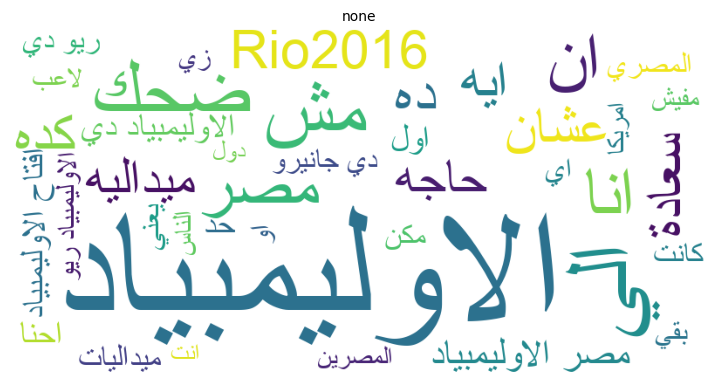

<Figure size 640x480 with 0 Axes>

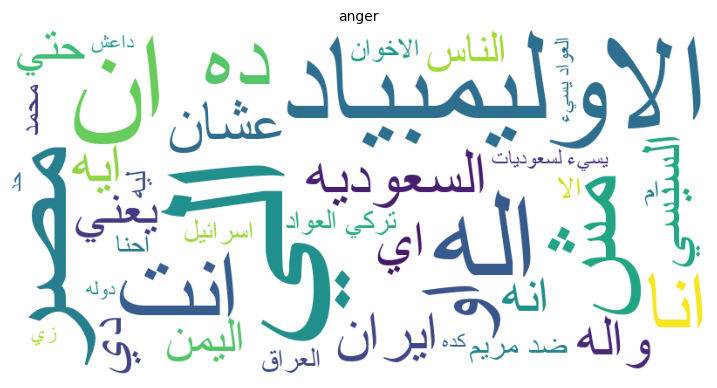

<Figure size 640x480 with 0 Axes>

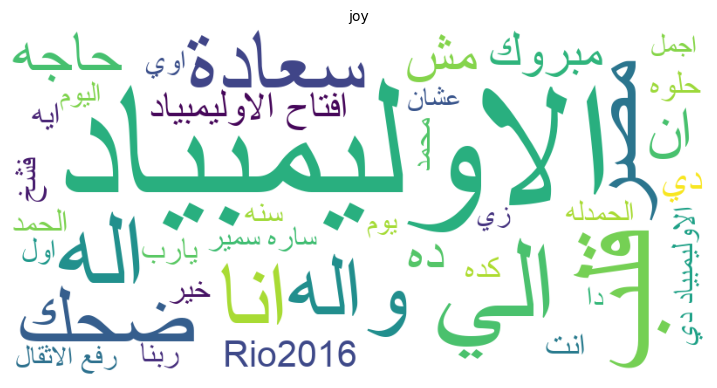

<Figure size 640x480 with 0 Axes>

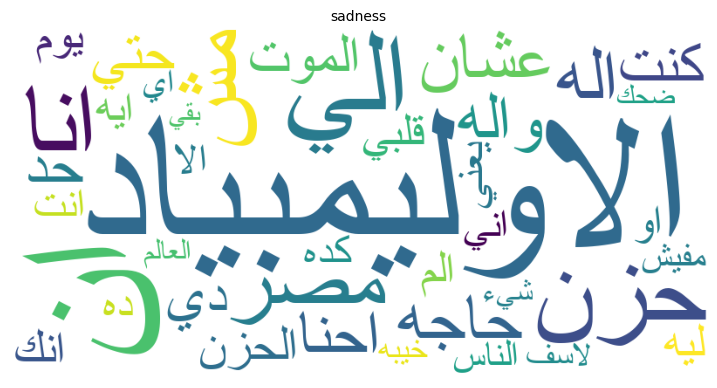

<Figure size 640x480 with 0 Axes>

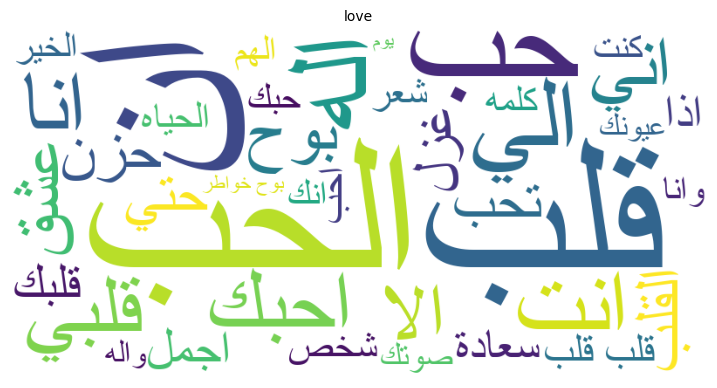

<Figure size 640x480 with 0 Axes>

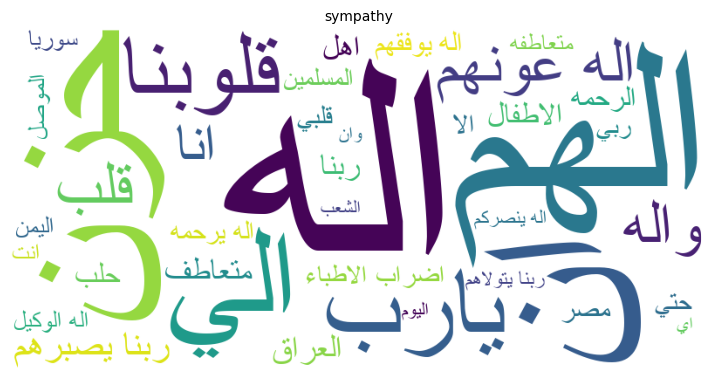

<Figure size 640x480 with 0 Axes>

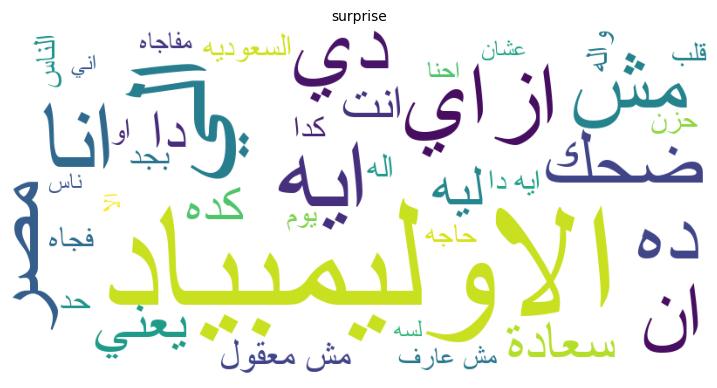

<Figure size 640x480 with 0 Axes>

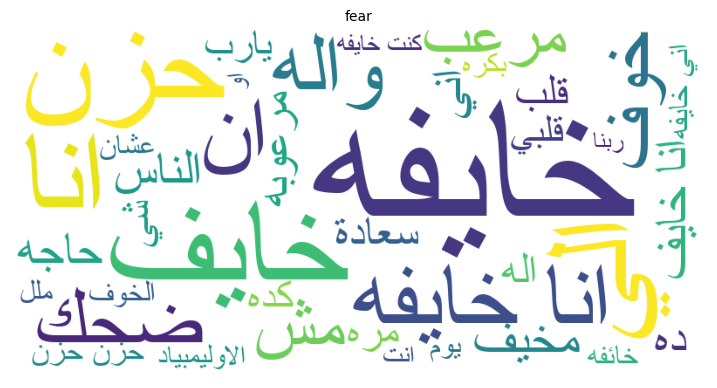

<Figure size 640x480 with 0 Axes>

In [71]:
grouped = df.groupby('label')

for label, group in grouped:
    text = ' '.join(group['tweets_processed'])
#     text = emoji.replace_emoji(text, replace='', version=-1)
    generateWordCloud(label, text)
    reshaped_text = arabic_reshaper.reshape(text)


|0 |none | 1550 |
|1 |anger | 1444 |
|2 |joy | 1281 |
|3 |sadness | 1256 |
|4 |love | 1220 |
|5 |sympathy | 1062 |
|6 |surprise | 1045 |
|7 |fear | 1207 |

## Data Preprocessing (2)

In [42]:
# def text_preprocessing(text):
#     text = replace_emoji(remove_repeating_char(remove_newlines(text)))
#     return text

## Model Finetuning 

In [3]:
# import os
# import re
# from tqdm import tqdm
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import csv

# %matplotlib inline

In [4]:
# import torch

# if torch.cuda.is_available():       
#     device = torch.device("cuda")
#     print(f'There are {torch.cuda.device_count()} GPU(s) available.')
#     print('Device name:', torch.cuda.get_device_name(0))

# else:
#     print('No GPU available, using the CPU instead.')
#     device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla P100-PCIE-16GB


In [15]:
# # import a model from huggingface
# from transformers import AutoTokenizer, AutoModel
# from transformers import BertTokenizer

# tokenizer = AutoTokenizer.from_pretrained('UBC-NLP/MARBERT')
# # tokenizer = AutoTokenizer.from_pretrained('aubmindlab/bert-base-arabertv2')

In [44]:
# all_tweets = temp_df.tweet.values

# encoded_tweets = [tokenizer.encode(text_preprocessing(sent), add_special_tokens=True) for sent in all_tweets]

# # Find the maximum length
# max_len = max([len(sent) for sent in encoded_tweets])
# print('Max length: ', max_len)

Max length:  58


In [45]:

# # Specify max length to trancuate/pad to
# MAX_LEN = 70

# def preprocessing_for_bert(data, text_preprocessing_fn = text_preprocessing ):
#     """Perform required preprocessing steps for pretrained BERT.
#     @param    data (np.array): Array of texts to be processed.
#     @return   input_ids (torch.Tensor): Tensor of token ids to be fed to a model.
#     @return   attention_masks (torch.Tensor): Tensor of indices specifying which
#                   tokens should be attended to by the model.
#     """
#     # Create empty lists to store outputs
#     input_ids = []
#     attention_masks = []

#     # For every sentence...
#     for i,sent in enumerate(data):
#         # `encode_plus` will:
#         #    (1) Tokenize the sentence
#         #    (2) Add the `[CLS]` and `[SEP]` token to the start and end
#         #    (3) Truncate/Pad sentence to max length
#         #    (4) Map tokens to their IDs
#         #    (5) Create attention mask
#         #    (6) Return a dictionary of outputs
#         encoded_sent = tokenizer.encode_plus(
#             text=text_preprocessing_fn(r""+sent),  # Preprocess sentence
#             add_special_tokens=True,        # Add `[CLS]` and `[SEP]`
#             max_length=MAX_LEN,                  # Max length to truncate/pad
#             padding='max_length',        # Pad sentence to max length
#             return_attention_mask=True,     # Return attention mask
#             truncation = True 
#             )
        
#         # Add the outputs to the lists
#         input_ids.append(encoded_sent.get('input_ids'))
#         attention_masks.append(encoded_sent.get('attention_mask'))
#     # Convert lists to tensors
#     input_ids = torch.tensor(input_ids)
#     attention_masks = torch.tensor(attention_masks)

#     return input_ids, attention_masks